# **PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS - NÚCLEO DE EDUCAÇÃO A DISTÂNCIA**

### Pós-graduação Lato Sensu em Ciência de Dados e Big Data


### **5. Avaliação dos Resultados**

### Carrega as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)  # Formatando impressão de Array Numpy
pd.set_option('display.float_format', lambda x: '%.1f' % x)  # Formatando impressão de numeros no Pandas

%matplotlib inline

In [ ]:
!pip install sweetviz   ## Instalar a Biblioteca de Visualização de Dados Sweetviz

In [3]:
import sweetviz as sv

# **Análise modelos KMEANS**

In [12]:
## Carregamento do Dataset utilizado no Aprendizado de Máquina
df_kmeans_ml = pd.read_csv('/content/BD_Rais_2019_CE_03.csv', dtype={"id_municipio":               "string",
                                                                  "qtde_vinculos_ativos":       "int64",
                                                                  "qtde_vinculos_clt":          "int64",
                                                                  "qtde_vinculos_estatutarios": "int64",
                                                                  "indicador_simples":          "int8",
                                                                  "natureza_juridica":          "string",
                                                                  "tamanho_estabelecimento":    "int64",
                                                                  "indicador_simples":          "int64",
                                                                  "cnae_2":                     "string",
                                                                  "cnae_2_subclasse":           "string",
                                                                  "subsetor_ibge":              "string",
                                                                  "cep_estabelecimento":        "string"})


In [13]:
## Reduzir o dataframe aos campos que tiveram significância na aplicação do algoritmo 
df_kmeans = df_kmeans_ml.drop(columns=["id_municipio","tamanho_estabelecimento","cnae_2_subclasse","cep_estabelecimento",
                                   'grupo_nj_1','grupo_nj_2','grupo_nj_3','grupo_nj_4','grupo_nj_5',
                                   'cnae_2_secao_A','cnae_2_secao_B','cnae_2_secao_C','cnae_2_secao_D','cnae_2_secao_E','cnae_2_secao_F',
                                   'cnae_2_secao_G','cnae_2_secao_H','cnae_2_secao_I','cnae_2_secao_J','cnae_2_secao_K','cnae_2_secao_L',
                                   'cnae_2_secao_M','cnae_2_secao_N','cnae_2_secao_O','cnae_2_secao_P','cnae_2_secao_Q','cnae_2_secao_R',
                                   'cnae_2_secao_S','cnae_2_secao_T','cnae_2_secao_U',
                                   'sub_ibge_01','sub_ibge_02','sub_ibge_03','sub_ibge_04','sub_ibge_05','sub_ibge_06','sub_ibge_07','sub_ibge_08',
                                   'sub_ibge_09','sub_ibge_10','sub_ibge_11','sub_ibge_12','sub_ibge_13','sub_ibge_14','sub_ibge_15','sub_ibge_16',
                                   'sub_ibge_17','sub_ibge_18','sub_ibge_19','sub_ibge_20','sub_ibge_21','sub_ibge_22','sub_ibge_23','sub_ibge_24',
                                   'sub_ibge_25'])


In [14]:
## Carregamento dos clusters (labels) gerados pelo modelo Kmeans
kmeans_cl = np.fromfile('/content/kmeans_label.txt',dtype='int8', sep=';')

In [ ]:
## Concatenando o Dataset com os labels dos Clusters
df_kmeans = pd.concat([df_kmeans,pd.DataFrame(kmeans_cl,columns=['cluster'])], axis=1)
df_kmeans.info()

In [27]:
## Separando o Dataset por Cluster atribuído a cada registro
df_kmeans_cl0 = df_kmeans.loc[df_kmeans['cluster'] == 0]
df_kmeans_cl1 = df_kmeans.loc[df_kmeans['cluster'] == 1] 
df_kmeans_cl2 = df_kmeans.loc[df_kmeans['cluster'] == 2] 
df_kmeans_cl3 = df_kmeans.loc[df_kmeans['cluster'] == 3] 
df_kmeans_cl4 = df_kmeans.loc[df_kmeans['cluster'] == 4] 

print('Cluster 0 - {:,} registros - {:.2f}%'.format(df_kmeans_cl0.shape[0],df_kmeans_cl0.shape[0]/df_kmeans.shape[0]*100))
print('Cluster 1 - {:,} registros - {:.2f}%'.format(df_kmeans_cl1.shape[0],df_kmeans_cl1.shape[0]/df_kmeans.shape[0]*100))
print('Cluster 2 - {:,} registros - {:.2f}%'.format(df_kmeans_cl2.shape[0],df_kmeans_cl2.shape[0]/df_kmeans.shape[0]*100))
print('Cluster 3 - {:,} registros - {:.2f}%'.format(df_kmeans_cl3.shape[0],df_kmeans_cl3.shape[0]/df_kmeans.shape[0]*100))
print('Cluster 4 - {:,} registros - {:.2f}%'.format(df_kmeans_cl4.shape[0],df_kmeans_cl4.shape[0]/df_kmeans.shape[0]*100))

Cluster 0 - 27,708 registros - 29.33%
Cluster 1 - 29,020 registros - 30.72%
Cluster 2 - 586 registros - 0.62%
Cluster 3 - 8,922 registros - 9.44%
Cluster 4 - 28,244 registros - 29.89%


**Analisando o CLUSTER 0**

In [ ]:
## CLUSTER 0 - Análise dos campos quantitativos
df_kmeans_cl0.describe(include='int64')

,qtde_vinculos_ativos,qtde_vinculos_clt,qtde_vinculos_estatutarios,indicador_simples
count,27708.0,27708.0,27708.0,27708.0
mean,2.5,2.5,0.0,0.8
std,1.7,1.7,0.0,0.4
min,1.0,1.0,0.0,0.0
25%,1.0,1.0,0.0,1.0
50%,2.0,2.0,0.0,1.0
75%,4.0,4.0,0.0,1.0
max,7.0,7.0,0.0,1.0


In [4]:
def plot_pizza(dataset,coluna,titulo,n_items=7):
  df = dataset.groupby(by=[coluna]).count().sort_values(by='cluster', ascending=False)

  ## Se a quantidade de itens agrupados (len(df)) for maior do que a solicitada (n_items), 
  ## fazer acumulação no código "Outros"
  codigos = []
  qtd = []
  if len(df) > n_items:    
    tot_outros = df['cluster'].iloc[n_items-1]
    for i in range(0,len(df)):
      codigos.append(df.index[i])
      qtd.append(df['cluster'].iloc[i])
      if i > n_items-1:
        tot_outros += df['cluster'].iloc[i]
    
    codigos[n_items-1] = 'Outros'
    qtd[n_items-1] = tot_outros
 
    df = pd.DataFrame(list(zip(codigos[:n_items],qtd[:n_items])), columns= [coluna,'cluster'])
    df.set_index(coluna, inplace=True)
  
  explode = (0.1,0.1)
  for i in range(2,len(df)):
    if i > (n_items-4):
      explode = explode + (0,)
    else:
      explode = explode + (0.1,)
  df['cluster'].plot(kind='pie', title=titulo, ylabel='', autopct='%1.0f%%', explode=explode)


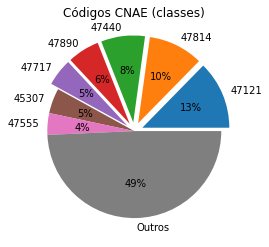

In [ ]:
plot_pizza(df_kmeans_cl0,'cnae_2', 'Códigos CNAE (classes)',8)

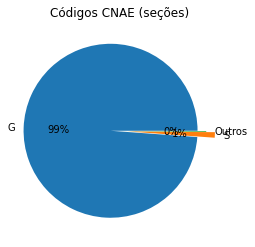

In [ ]:
plot_pizza(df_kmeans_cl0,'cnae_2_secao', 'Códigos CNAE (seções)',3)

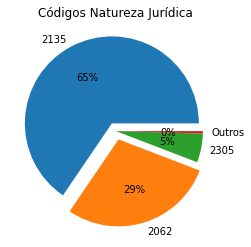

In [ ]:
plot_pizza(df_kmeans_cl0,'natureza_juridica', 'Códigos Natureza Jurídica',4)

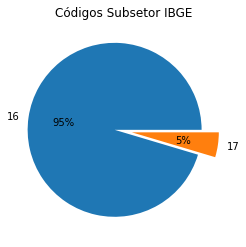

In [ ]:
plot_pizza(df_kmeans_cl0,'subsetor_ibge', 'Códigos Subsetor IBGE')

In [ ]:
# Analizando o CLUSTER 0
sv_config = sv.FeatureConfig(skip=["cluster"], 
                             force_num=["qtde_vinculos_ativos","qtde_vinculos_clt","qtde_vinculos_estatutarios"], 
                             force_cat=["cnae_2","natureza_juridica"])

rais_report = sv.analyze(df_kmeans_cl0, feat_cfg=sv_config)

#Salvando o Relatório
rais_report.show_html('Rais_kmeans0.html')

#Mostrando o Relatório
rais_report.show_notebook()

**Analisando o CLUSTER 1**

In [ ]:
## CLUSTER 1 - Análise dos campos quantitativos
df_kmeans_cl1.describe(include='int64')

,qtde_vinculos_ativos,qtde_vinculos_clt,qtde_vinculos_estatutarios,indicador_simples
count,29020.0,29020.0,29020.0,29020.0
mean,2.1,2.1,0.0,0.6
std,1.2,1.2,0.0,0.5
min,1.0,1.0,0.0,0.0
25%,1.0,1.0,0.0,0.0
50%,2.0,2.0,0.0,1.0
75%,3.0,3.0,0.0,1.0
max,5.0,5.0,0.0,1.0


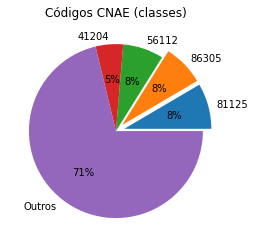

In [ ]:
plot_pizza(df_kmeans_cl1,'cnae_2', 'Códigos CNAE (classes)',5)


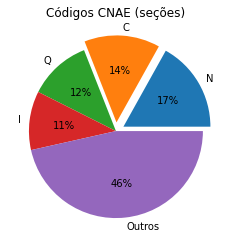

In [ ]:
plot_pizza(df_kmeans_cl1,'cnae_2_secao', 'Códigos CNAE (seções)',5)

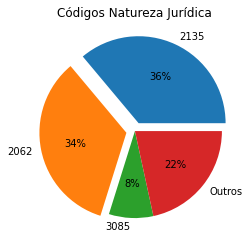

In [ ]:
plot_pizza(df_kmeans_cl1,'natureza_juridica', 'Códigos Natureza Jurídica',4)

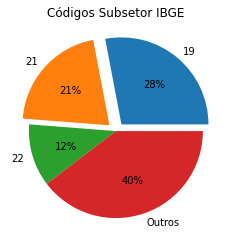

In [ ]:
plot_pizza(df_kmeans_cl1,'subsetor_ibge', 'Códigos Subsetor IBGE',4)

In [ ]:
# Analizando o CLUSTER 1
sv_config = sv.FeatureConfig(skip=["cluster"],
                             force_num=["qtde_vinculos_ativos","qtde_vinculos_clt","qtde_vinculos_estatutarios"], 
                             force_cat=["cnae_2","natureza_juridica"])

rais_report = sv.analyze(df_kmeans_cl1, feat_cfg=sv_config)

#Salvando o Relatório
rais_report.show_html('Rais_kmeans1.html')

#Mostrando o Relatório
rais_report.show_notebook()

**Analisando o CLUSTER 2**

In [ ]:
## CLUSTER 2 - Análise dos campos quantitativos
df_kmeans_cl2.describe(include='int64')

,qtde_vinculos_ativos,qtde_vinculos_clt,qtde_vinculos_estatutarios,indicador_simples
count,586.0,586.0,586.0,586.0
mean,705.5,98.7,606.9,0.0
std,2211.5,801.2,1652.2,0.1
min,1.0,0.0,1.0,0.0
25%,17.0,0.0,13.2,0.0
50%,106.5,0.0,86.0,0.0
75%,759.0,2.0,659.8,0.0
max,39417.0,17912.0,21505.0,1.0


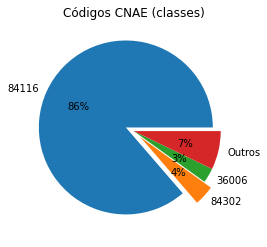

In [ ]:
plot_pizza(df_kmeans_cl2,'cnae_2', 'Códigos CNAE (classes)',4)


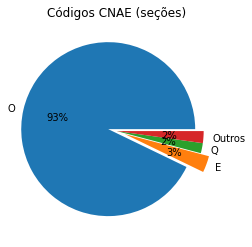

In [ ]:
plot_pizza(df_kmeans_cl2,'cnae_2_secao', 'Códigos CNAE (seções)',4)

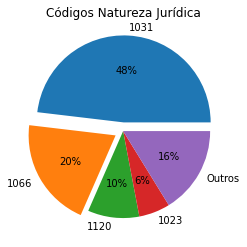

In [ ]:
plot_pizza(df_kmeans_cl2,'natureza_juridica', 'Códigos Natureza Jurídica',5)

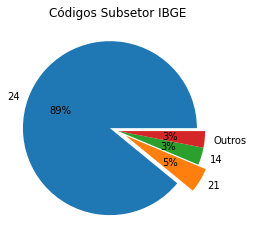

In [ ]:
plot_pizza(df_kmeans_cl2,'subsetor_ibge', 'Códigos Subsetor IBGE',4)

In [ ]:
# Analizando o CLUSTER 2
sv_config = sv.FeatureConfig(skip=["cluster"],
                             force_num=["qtde_vinculos_ativos","qtde_vinculos_clt","qtde_vinculos_estatutarios"], 
                             force_cat=["cnae_2","natureza_juridica"])

rais_report = sv.analyze(df_kmeans_cl2, feat_cfg=sv_config)

#Salvando o Relatório
rais_report.show_html('Rais_kmeans2.html')

#Mostrando o Relatório
rais_report.show_notebook()

**Analisando o CLUSTER 3**

In [ ]:
## CLUSTER 3 - Análise dos campos quantitativos
df_kmeans_cl3.describe(include='int64')

,qtde_vinculos_ativos,qtde_vinculos_clt,qtde_vinculos_estatutarios,indicador_simples
count,8922.0,8922.0,8922.0,8922.0
mean,0.0,0.0,0.0,0.7
std,0.0,0.0,0.0,0.5
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,1.0
75%,0.0,0.0,0.0,1.0
max,0.0,0.0,0.0,1.0


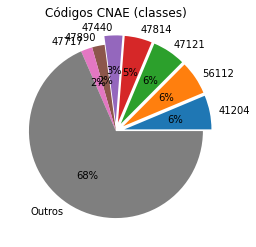

In [10]:
plot_pizza(df_kmeans_cl3,'cnae_2', 'Códigos CNAE (classes)',8)


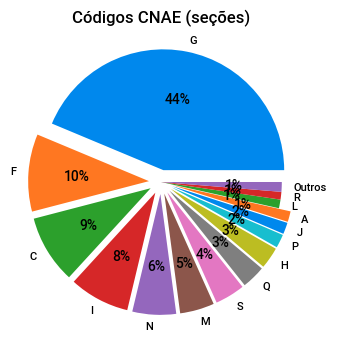

In [15]:
plot_pizza(df_kmeans_cl3,'cnae_2_secao', 'Códigos CNAE (seções)',15)

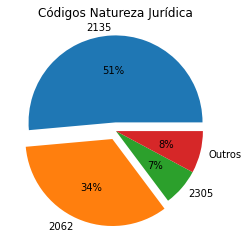

In [ ]:
plot_pizza(df_kmeans_cl3,'natureza_juridica', 'Códigos Natureza Jurídica',4)

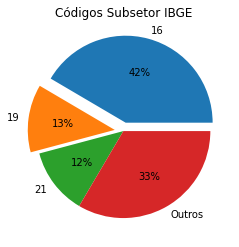

In [ ]:
plot_pizza(df_kmeans_cl3,'subsetor_ibge', 'Códigos Subsetor IBGE',4)

In [ ]:
# Analizando o CLUSTER 3
sv_config = sv.FeatureConfig(skip=["cluster"], 
                             force_num=["qtde_vinculos_ativos","qtde_vinculos_clt","qtde_vinculos_estatutarios"], 
                             force_cat=["cnae_2","natureza_juridica"])

rais_report = sv.analyze(df_kmeans_cl3, feat_cfg=sv_config)

#Salvando o Relatório
rais_report.show_html('Rais_kmeans3.html')

#Mostrando o Relatório
rais_report.show_notebook()

**Analisando o CLUSTER 4**

In [ ]:
## CLUSTER 4 - Análise dos campos quantitativos
df_kmeans_cl4.describe(include='int64')

,qtde_vinculos_ativos,qtde_vinculos_clt,qtde_vinculos_estatutarios,indicador_simples
count,28244.0,28244.0,28244.0,28244.0
mean,34.2,34.2,0.0,0.5
std,166.3,166.3,0.0,0.5
min,5.0,5.0,0.0,0.0
25%,8.0,8.0,0.0,0.0
50%,12.0,12.0,0.0,0.0
75%,24.0,24.0,0.0,1.0
max,12168.0,12168.0,0.0,1.0


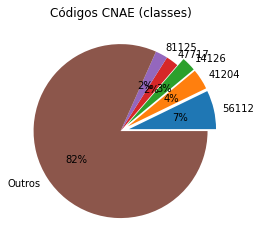

In [ ]:
plot_pizza(df_kmeans_cl4,'cnae_2', 'Códigos CNAE (classes)',6)


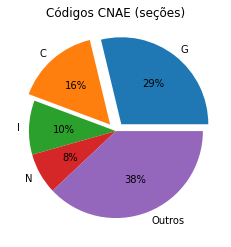

In [ ]:
plot_pizza(df_kmeans_cl4,'cnae_2_secao', 'Códigos CNAE (seções)',5)

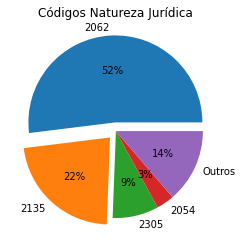

In [ ]:
plot_pizza(df_kmeans_cl4,'natureza_juridica', 'Códigos Natureza Jurídica',5)

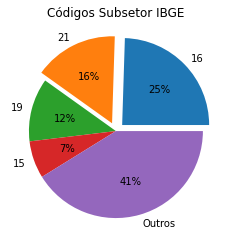

In [ ]:
plot_pizza(df_kmeans_cl4,'subsetor_ibge', 'Códigos Subsetor IBGE',5)

In [ ]:
# Analizando o CLUSTER 4
sv_config = sv.FeatureConfig(skip=["cluster"], 
                             force_num=["qtde_vinculos_ativos","qtde_vinculos_clt","qtde_vinculos_estatutarios"], 
                             force_cat=["cnae_2","natureza_juridica"])

rais_report = sv.analyze(df_kmeans_cl4, feat_cfg=sv_config)

#Salvando o Relatório
rais_report.show_html('Rais_kmeans4.html')

#Mostrando o Relatório
rais_report.show_notebook()